In [37]:
#Restrições
# Um vértice pode representar no máximo uma partição
# Uma partição pode ter no máximo um representante
# Desvio absoluto do número de partições em relação ao valor K
# Garantindo que o gradiente da FO não aponte para o máximo local: Contendo o valor máximo das variáveis 
# de folga para que o desvio na quantidade de componentes não seja benéfico para a solução.
# Relação de representantes e não representantes e disjunção de componentes: Se um vértice NÃO É um 
#  representante então ele DEVE estar conectado à um representante, por outro lado se um 
#  vértice É um representante então ele NÃO DEVE estar conectado à outro representante.
#  Um representante não conectado à outro em paralelo com a última restrição garante que as partições
#  sejam disjuntas.
# Componentes fortemente conexos: Se um vértice A é ligado à um vértice B então A deve ser vizinho de todos
#   os vizinhos de B.

$$
\begin{align}
V: & \text{set of vertices indices}\\
E: & \text{set of edges indices}\\
\Pi: & \text{set of partitions indices}\\
K: & \text{number of partitions } |\Pi|\\
\rho_{i\pi}:  & \text{representative vertex $i$ of the partition $\pi$}\\
\epsilon_{ij}:  & \text{edge between the vertices $i$ and $j$}\\
s^-, s^+: & \text{absolute deviation from the number of partitions}\\
\omega_{ij}:  & \text{wieght of the edge between the vertices $i$ and $j$}\\
n(i): & \text{neighborhoods of the edge $i$}\\
\lambda: & \text{penalty for not create a partition}
\end{align}
$$


$$
\underset{\rho, \epsilon, \kappa}\min \left\{z := \sum_{(i, j) \in E}\omega_{ij}\epsilon_{ij} + \lambda\big(K - \kappa^- - \kappa^+\big) \right\}, \text{ where } \lambda := \sum_{(i, j) \in E}\omega_{ij}
$$

$$
\begin{align}
\sum_{\pi \in \Pi} \rho_{i\pi} \leq 1 & & \forall i \in V\\
\sum_{i \in V} \rho_{i\pi} \leq 1 & & \forall \pi \in \Pi\\
\sum_{\pi \in \Pi}\sum_{i \in V} \rho_{i\pi} + \kappa^- - \kappa^+ = K & &\\
\kappa^- + \kappa^+ \leq K\\
1 - \sum_{\pi \in \Pi}\rho_{i\pi} = \sum_{j \in n(i)}\epsilon_{ij}\sum_{\pi \in \Pi}\rho_{j\pi} & & \forall i \in V\\
\epsilon_{ij}\sum_{k \in n(i) \cap n(j)}\big(\epsilon_{ik} + \epsilon_{jk}\big) = \epsilon_{ij}\left(\sum_{k \in n(i)}\epsilon_{ik} + \sum_{k \in n(j)}\epsilon_{jk} - 2\right) & & \forall (i, j) \in E\\
\rho_{i\pi} \in \{0, 1\} & & \forall (i, \pi) \in V \times \Pi\\
\epsilon_{ij} \in \{0, 1\} & & \forall (i, j) \in E\\
\kappa^-, \kappa^+ \in \mathbb{R}^+
\end{align}
$$

$$

$$

### Removed constraints

Esta restrição evita apenas que dois representantes estejam conectados, mas não garante que um não representante
esteja conectado à um vértice que é um representante.
$$
\sum_{\pi \in \Pi}\big(\rho_{i\pi} + \rho_{j\pi}\big) + \epsilon_{ij} < 3 \quad \forall (i, j) \in E\\
$$

### Linearized constraint

$$
(|n(i)| + |n(j)|)\left(1 - \epsilon_{ij}\right) + \sum_{k \in n(i) \cap n(j)}\big(\epsilon_{ik} + \epsilon_{jk}\big) \geq \sum_{k \in n(i)}\epsilon_{ik} + \sum_{k \in n(j)}\epsilon_{jk} - 2
$$

## Testing constraint

In [31]:
import numpy as np

def remove_edges(edges):
    for i, j in edges:
        graph[i, j] = 0
        graph[j, i] = 0
        epsilon[i, j] = 0
        epsilon[j, i] = 0
        
def disable_edges(edges):
    for i, j in edges:
        epsilon[i, j] = 0
        epsilon[j, i] = 0
    
def test_constraint(graph, epsilon):
    def fn(i, j):
        indices = np.arange(0, len(graph))
        n_i = indices[graph[i] != 0]
        n_j = indices[graph[j] != 0]
        
        n_ij = indices[(graph[i] != 0) & (graph[j] != 0)]
        
        lhs = epsilon[i, j] * (epsilon[i, n_ij].sum() + epsilon[j, n_ij].sum())
        rhs = epsilon[i, j] * (epsilon[i, n_i].sum() + epsilon[j, n_j].sum() - 2)
        
        return f'{lhs} = {rhs}   {lhs == rhs}'
        
    tests = []
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i, j] != 0 and graph[j, i] != 0 and (j, i) not in tests:
                print((i, j), fn(i, j))
                tests.append((i, j))

'''
def test_constraint_linearized(graph, epsilon):
    def fn(i, j):
        indices = np.arange(0, len(graph))
        n_i = indices[graph[i] != 0]
        n_j = indices[graph[j] != 0]
        
        n_ij = indices[(graph[i] != 0) & (graph[j] != 0)]
        
        lhs = (len(n_i) + len(n_j)) * (1 - epsilon[i, j]) + (epsilon[i, n_ij].sum() + epsilon[j, n_ij].sum())
        rhs = epsilon[i, n_i].sum() + epsilon[j, n_j].sum() - 2
        
        return f'{lhs} >= {rhs}   {lhs >= rhs}'
        
    tests = []
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i, j] != 0 and graph[j, i] != 0 and (j, i) not in tests:
                print((i, j), fn(i, j))
                tests.append((i, j))
'''

"\ndef test_constraint_linearized(graph, epsilon):\n    def fn(i, j):\n        indices = np.arange(0, len(graph))\n        n_i = indices[graph[i] != 0]\n        n_j = indices[graph[j] != 0]\n        \n        n_ij = indices[(graph[i] != 0) & (graph[j] != 0)]\n        \n        lhs = (len(n_i) + len(n_j)) * (1 - epsilon[i, j]) + (epsilon[i, n_ij].sum() + epsilon[j, n_ij].sum())\n        rhs = epsilon[i, n_i].sum() + epsilon[j, n_j].sum() - 2\n        \n        return f'{lhs} >= {rhs}   {lhs >= rhs}'\n        \n    tests = []\n    for i in range(len(graph)):\n        for j in range(len(graph)):\n            if graph[i, j] != 0 and graph[j, i] != 0 and (j, i) not in tests:\n                print((i, j), fn(i, j))\n                tests.append((i, j))\n"

### Complete graph (must be feasible)
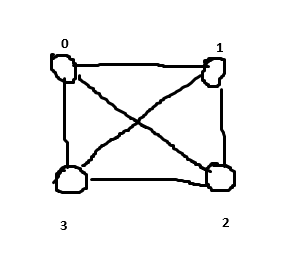

In [32]:
graph = -(np.eye(4, dtype=int) - 1) 
epsilon = -(np.eye(4, dtype=int) - 1) 

print('Graph\n', '\n'.join(map(str, graph)), sep='', end='\n\n')
print('Epsilon\n', '\n'.join(map(str, epsilon)), sep='', end='\n\n')
            
test_constraint(graph, epsilon)

Graph
[0 1 1 1]
[1 0 1 1]
[1 1 0 1]
[1 1 1 0]

Epsilon
[0 1 1 1]
[1 0 1 1]
[1 1 0 1]
[1 1 1 0]

(0, 1) 4 = 4   True
(0, 2) 4 = 4   True
(0, 3) 4 = 4   True
(1, 2) 4 = 4   True
(1, 3) 4 = 4   True
(2, 3) 4 = 4   True


### Edge (0, 2) does not exists (must be infeasible)
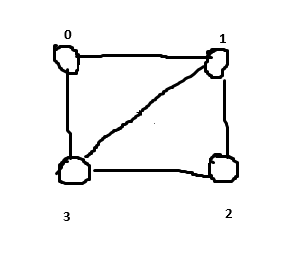

In [33]:
graph = -(np.eye(4, dtype=int) - 1) 
epsilon = -(np.eye(4, dtype=int) - 1) 

remove_edges([(0, 2)])

print('Graph\n', '\n'.join(map(str, graph)), sep='', end='\n\n')
print('Epsilon\n', '\n'.join(map(str, epsilon)), sep='', end='\n\n')
            
test_constraint(graph, epsilon)

Graph
[0 1 0 1]
[1 0 1 1]
[0 1 0 1]
[1 1 1 0]

Epsilon
[0 1 0 1]
[1 0 1 1]
[0 1 0 1]
[1 1 1 0]

(0, 1) 2 = 3   False
(0, 3) 2 = 3   False
(1, 2) 2 = 3   False
(1, 3) 4 = 4   True
(2, 3) 2 = 3   False


### Edge (0, 2) does not exists and edges (2, 1) and (2, 3) was disabled (must be feasible)
![Complete%204%20without%20%280,%202%29,%20(2,%201)%20and%20(2,%203).png](attachment:Complete%204%20without%20%280,%202%29,%20(2,%201)%20and%20(2,%203).png)
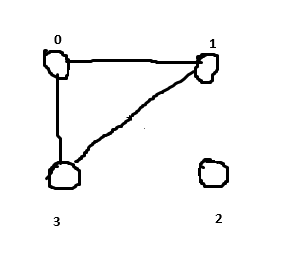

In [34]:
graph = -(np.eye(4, dtype=int) - 1) 
epsilon = -(np.eye(4, dtype=int) - 1) 

remove_edges([(0, 2)])
disable_edges([(2, 1), (2, 3)])

print('Graph\n', '\n'.join(map(str, graph)), sep='', end='\n\n')
print('Epsilon\n', '\n'.join(map(str, epsilon)), sep='', end='\n\n')
            
test_constraint(graph, epsilon)

Graph
[0 1 0 1]
[1 0 1 1]
[0 1 0 1]
[1 1 1 0]

Epsilon
[0 1 0 1]
[1 0 0 1]
[0 0 0 0]
[1 1 0 0]

(0, 1) 2 = 2   True
(0, 3) 2 = 2   True
(1, 2) 0 = 0   True
(1, 3) 2 = 2   True
(2, 3) 0 = 0   True


### Edge (0, 1) and (1, 3) exists (must be infeasible)
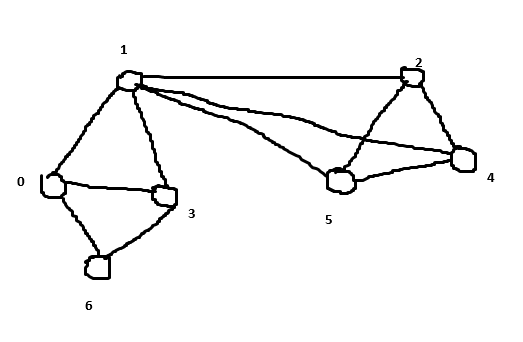

In [35]:
graph = np.array([
   # 0  1  2  3  4  5  6
    [0, 1, 0, 1, 0, 0, 1], # 0
    [1, 0, 1, 1, 1, 1, 0], # 1
    [0, 1, 0, 0, 1, 1, 0], # 2
    [1, 1, 0, 0, 0, 0, 1], # 3
    [0, 1, 1, 0, 0, 1, 0], # 4
    [0, 1, 1, 0, 1, 0, 0], # 5
    [1, 0, 0, 1, 0, 0, 0]  # 6
])
epsilon = np.copy(graph)

print('Graph\n', '\n'.join(map(str, graph)), sep='', end='\n\n')
print('Epsilon\n', '\n'.join(map(str, epsilon)), sep='', end='\n\n')
            
test_constraint(graph, epsilon)

Graph
[0 1 0 1 0 0 1]
[1 0 1 1 1 1 0]
[0 1 0 0 1 1 0]
[1 1 0 0 0 0 1]
[0 1 1 0 0 1 0]
[0 1 1 0 1 0 0]
[1 0 0 1 0 0 0]

Epsilon
[0 1 0 1 0 0 1]
[1 0 1 1 1 1 0]
[0 1 0 0 1 1 0]
[1 1 0 0 0 0 1]
[0 1 1 0 0 1 0]
[0 1 1 0 1 0 0]
[1 0 0 1 0 0 0]

(0, 1) 2 = 6   False
(0, 3) 4 = 4   True
(0, 6) 2 = 3   False
(1, 2) 4 = 6   False
(1, 3) 2 = 6   False
(1, 4) 4 = 6   False
(1, 5) 4 = 6   False
(2, 4) 4 = 4   True
(2, 5) 4 = 4   True
(3, 6) 2 = 3   False
(4, 5) 4 = 4   True


### Edge (0, 1) and (1, 3) was disabled (must be feasible)
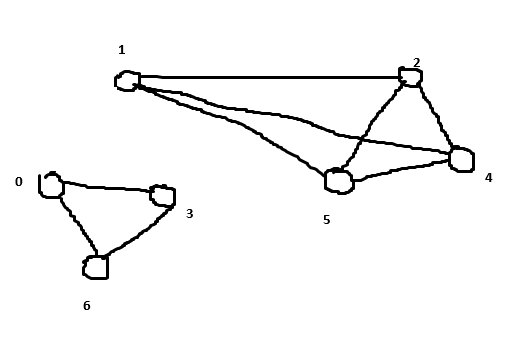

In [36]:
graph = np.array([
   # 0  1  2  3  4  5  6
    [0, 1, 0, 1, 0, 0, 1], # 0
    [1, 0, 1, 1, 1, 1, 0], # 1
    [0, 1, 0, 0, 1, 1, 0], # 2
    [1, 1, 0, 0, 0, 0, 1], # 3
    [0, 1, 1, 0, 0, 1, 0], # 4
    [0, 1, 1, 0, 1, 0, 0], # 5
    [1, 0, 0, 1, 0, 0, 0]  # 6
])
epsilon = np.copy(graph)

disable_edges([(0, 1), (1, 3)])

print('Graph\n', '\n'.join(map(str, graph)), sep='', end='\n\n')
print('Epsilon\n', '\n'.join(map(str, epsilon)), sep='', end='\n\n')
            
test_constraint(graph, epsilon)

Graph
[0 1 0 1 0 0 1]
[1 0 1 1 1 1 0]
[0 1 0 0 1 1 0]
[1 1 0 0 0 0 1]
[0 1 1 0 0 1 0]
[0 1 1 0 1 0 0]
[1 0 0 1 0 0 0]

Epsilon
[0 0 0 1 0 0 1]
[0 0 1 0 1 1 0]
[0 1 0 0 1 1 0]
[1 0 0 0 0 0 1]
[0 1 1 0 0 1 0]
[0 1 1 0 1 0 0]
[1 0 0 1 0 0 0]

(0, 1) 0 = 0   True
(0, 3) 2 = 2   True
(0, 6) 2 = 2   True
(1, 2) 4 = 4   True
(1, 3) 0 = 0   True
(1, 4) 4 = 4   True
(1, 5) 4 = 4   True
(2, 4) 4 = 4   True
(2, 5) 4 = 4   True
(3, 6) 2 = 2   True
(4, 5) 4 = 4   True
